***
# Arytmetyka komputerowa
***
## Mateusz Powęska
***
## Zadanie 1 Sumowanie liczb pojedynczej precyzji
***

In [45]:
from numpy import float32, float64
import time
import numpy as np

In [46]:
length = 10 ** 7
value = float32(0.53125)
array = [value] * length
result = float32(0.0)
result_array = [result]

start_time = time.time()

for i in array:
    result += value
    result_array.append(result)

end_time = time.time()

iter_time = round(end_time - start_time, 2)
print("Result: ", result)
print("Expected result: ", value * length)

Result:  5030840.5
Expected result:  5312500.0


In [47]:
def absolute_error(iter_result, real_result):
    return abs(real_result - iter_result)


def relative_error(iter_result, real_result):
    return abs(real_result - iter_result) / real_result


print("Absolute error: ", absolute_error(result, value * length))
print("Relative error: ", relative_error(result, value * length))

Absolute error:  281659.5
Relative error:  0.05301825882352941


Tak duży błąd występuje, ponieważ przy dodawaniu liczb pojedynczej precyzji odpowiedni rząd po przecinku zostaje obcinany. Efekt potęguje się wraz ze wzrostem różnicy dodawanych liczb. Na pewnym etapie iteracji do małej liczby dodajemy bardzo dużą i dlatego błąd osiąga ponad 5%.

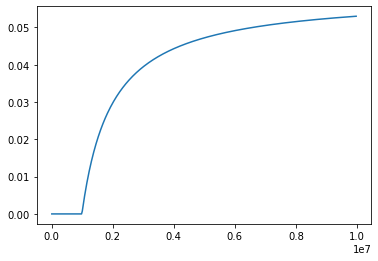

In [48]:
import matplotlib.pyplot as plt

x = []
y = []
step = 25000

for i in range(1, length, 25000):
    y.append(relative_error(result_array[i], i * value))
    x.append(i)

plt.plot(x, y)

Jak widać na wykresie początkowo błąd wynosi 0 ponieważ dodajemy do siebie dwie małe liczby. Od pewnego momentu algorytm zaczyna dodawać małą liczbę do dużej i błąd rośnie. Spowodowane jest to tym, że brakująca liczba bitów zostaje pominięta.

In [49]:
def recursive_adding(input_array):
    n = len(input_array)
    if n == 0:
        return float32(0.0)
    elif n == 1:
        return input_array[0]
    return recursive_adding(input_array[:n // 2]) + recursive_adding(input_array[n // 2:])


def faster_recursive_adding(input_array):
    a_length = len(input_array)
    if a_length == 1: return input_array[0]

    new_array = []

    for j in range(0, a_length - 1, 2):
        new_array.append(input_array[j] + input_array[j + 1])

    if a_length % 2 != 0:
        new_array.append(input_array[-1])

    return faster_recursive_adding(new_array)


start_time = time.time()
recursive_faster_result = faster_recursive_adding(array)
end_time = time.time()
recursive_faster_time = round(end_time - start_time, 2)

start_time = time.time()
recursive_result = recursive_adding(array)
end_time = time.time()
recursive_time = round(end_time - start_time, 2)

print("Result of the faster algorithm: ", recursive_faster_result)
print("Result of the classic algorithm: ", recursive_result)

Result of the faster algorithm:  5312500.0
Result of the classic algorithm:  5312500.0


Zaimplementowałem dwie wersje algorytmu rekurencyjnego - klasyczną i przyspieszoną.
Klasyczna w jednym wywołaniu dodaje do siebie dwie wartości.
Przyspieszona w jednym wywołaniu dodaje do siebie kolejno parami wszystkie wartości w tablicy (zużywa więcej pamięci poprzez tworzenie nowych tablic).
Obie wersje zwracają oczekiwany wynik.

In [50]:
print("Absolute error of the classic recursive algorithm: ", absolute_error(recursive_result, value * length))
print("Relative error of the classic recursive algorithm: ", relative_error(recursive_result, value * length))

print("Absolute error of the faster recursive algorithm: ", absolute_error(recursive_faster_result, value * length))
print("Relative error of the faster recursive algorithm: ", relative_error(recursive_faster_result, value * length))

Absolute error of the classic recursive algorithm:  0.0
Relative error of the classic recursive algorithm:  0.0
Absolute error of the faster recursive algorithm:  0.0
Relative error of the faster recursive algorithm:  0.0


Błąd spadł do 0 - wynika to z tego, że dodajemy dwie równe lub bliskie sobie liczby i końcowe bity nie zostają pominięte.

In [51]:
print("Time for iteration algorithm: ", iter_time)
print("Time for classic recursive algorithm: ", recursive_time)
print("Time for faster recursive algorithm: ", recursive_faster_time)

Time for iteration algorithm:  2.23
Time for classic recursive algorithm:  7.94
Time for faster recursive algorithm:  2.07


Czas klasycznej rekurencji jest około 5 krotnie wiekszy od iteracyjnej wersji.
Ulepszona wersja rekurencji ma trochę lepszy czas od wersji iteracyjnej.

In [52]:
sample_num = float32(0.1233333)
sample_input = [sample_num] * length
print("Absolute error of the classic recursive algorithm: ",
      absolute_error(recursive_adding(sample_input), sample_num * length))
print("Absolute error of the faster recursive algorithm: ",
      absolute_error(faster_recursive_adding(sample_input), sample_num * length))

Absolute error of the classic recursive algorithm:  0.023301124572753906
Absolute error of the faster recursive algorithm:  0.023301124572753906


Są to przykładowe dane dla których błąd występuje. W pewnym momencie dwie dodawane liczby różnią się na tyle, żeby końcowe bity zostały pomijane.
Analizując otrzymane wyniki można przypuszczać, że ulepszona wersja rekurencji jest poprawna.

***
## Zadanie 2 Algorytm Kahana
***

In [53]:
def kahan_algorithm(arr):
    sum_cnt = float32(0.0)
    err = float32(0.0)
    for i in range(0, len(arr)):
        y = arr[i] - err
        temp = sum_cnt + y
        err = (temp - sum_cnt) - y
        sum_cnt = temp

    return sum_cnt

In [54]:
start_time = time.time()
kahan_result = kahan_algorithm(array)
end_time = time.time()

kahan_time = round(end_time - start_time, 2)
print("Absolute error: ", absolute_error(kahan_result, value * length))
print("Relative error: ", relative_error(kahan_result, value * length))

Absolute error:  0.0
Relative error:  0.0


Algorytm Kahana ma znacznie lepsze właności numeryczne, ponieważ uwzględnia utracone bity podczas sumowania i przy następnej iteracji zostają one dodane. Dodatkowym atutem jest również to, że nie trzeba uzywać rekurencji.
Zmienna err służy do uwzględnienia utraty bitów.

In [55]:
print("Kahan's algorithm time: ", kahan_time)
print("Recursive time: ", recursive_time)


Kahan's algorithm time:  3.38
Recursive time:  7.94


Czas skrócił się prawie trzykrotnie.
Algorytm Kahana jest lepszym rozwiązaniem od wersji rekurencyjnej.

***
## Zadanie 3 Sumy częściowe
***

In [56]:
#trzeba użyć konwersji na odpowiedniego float'a przy operacjach matematycznych, żeby oczekiwna prezycja się nie zmieniła

def riemann_dzeta_forward(s, n, convert_to_float):
    sum_dzeta = convert_to_float(0.0)
    for k in range(1, n + 1):
        sum_dzeta += convert_to_float(1.0) / (convert_to_float(k) ** s)

    return sum_dzeta


def dirichlet_eta_forward(s, n, convert_to_float):
    sum_eta = convert_to_float(0.0)
    for k in range(1, n + 1):
        sum_eta += (convert_to_float(-1.0) ** convert_to_float(k - 1)) * (1 / (convert_to_float(k) ** s))

    return sum_eta


def riemann_dzeta_backward(s, n, convert_to_float):
    sum_dzeta = convert_to_float(0.0)
    for k in range(n, 0, -1):
        sum_dzeta += convert_to_float(1.0) / (convert_to_float(k) ** s)

    return sum_dzeta


def dirichlet_eta_backward(s, n, convert_to_float):
    sum_eta = convert_to_float(0.0)
    for k in range(n, 0, -1):
        sum_eta += (convert_to_float(-1.0) ** convert_to_float(k - 1)) * (1 / (convert_to_float(k) ** s))

    return sum_eta


s = [2, 3.6667, 7.2, 9.9999]
n = [50, 100, 200, 500, 1000]


def calculate_dzeta_and_eta(s, iterations):
    s_f32, s_f64 = list(map(lambda a: float32(a), s)), list(map(lambda a: float64(a), s))

    for f32, f64 in zip(s_f32, s_f64):
        for i in iterations:
            print("iterations: ", i)
            print("s value: ", f32)
            print()
            print("Riemann's dzeta forward float32: ", riemann_dzeta_forward(f32, i, float32))
            print("Riemann's dzeta backward float32: ", riemann_dzeta_backward(f32, i, float32))
            print("Riemann's dzeta forward float64: ", riemann_dzeta_forward(f64, i, float64))
            print("Riemann's dzeta backward float64: ", riemann_dzeta_backward(f64, i, float64))
            print()
            print("Dirichlet's eta forward float32: ", dirichlet_eta_forward(f32, i, float32))
            print("Dirichlet's eta backward float32: ", dirichlet_eta_backward(f32, i, float32))
            print("Dirichlet's eta forward float64: ", dirichlet_eta_forward(f64, i, float64))
            print("Dirichlet's eta backward float64: ", dirichlet_eta_backward(f64, i, float64))
            print()


calculate_dzeta_and_eta(s, n)

iterations:  50
s value:  2.0

Riemann's dzeta forward float32:  1.6251329
Riemann's dzeta backward float32:  1.6251327
Riemann's dzeta forward float64:  1.625132733621529
Riemann's dzeta backward float64:  1.6251327336215293

Dirichlet's eta forward float32:  0.8222710318260295
Dirichlet's eta backward float32:  0.8222710318260289
Dirichlet's eta forward float64:  0.8222710318260295
Dirichlet's eta backward float64:  0.8222710318260289

iterations:  100
s value:  2.0

Riemann's dzeta forward float32:  1.634984
Riemann's dzeta backward float32:  1.6349839
Riemann's dzeta forward float64:  1.6349839001848923
Riemann's dzeta backward float64:  1.634983900184893

Dirichlet's eta forward float32:  0.8224175333741286
Dirichlet's eta backward float32:  0.8224175333741282
Dirichlet's eta forward float64:  0.8224175333741286
Dirichlet's eta backward float64:  0.8224175333741282

iterations:  200
s value:  2.0

Riemann's dzeta forward float32:  1.6399467
Riemann's dzeta backward float32:  1.639

Zdarza się że wyniki dla pojedynczej i podwójnej precyzji różnią się, tak jak w poprzednich przykładach spowodowane jest to pomijaniem końcowych bitów (float64 ma większą ilość bitów w swojej reprezentacji więc jest dokładniejszy).
Wyniki sumowania w przód i w tył dla tych samych prezycji również się różnią - jest to spowodowane kolejnością dodawania, która ma znaczenie przy dodawaniu liczb o ograniczonej prezycji.
W niektórych przykładach wraz wzrostem iteracji różnica między sumowaniem w przód i w tył zwiększa się.

***
## Zadanie 4 Błędy zaokrągleń i odwzorowanie logistyczne (dodatkowe)
***

In [57]:
def logistic_mapping(r, x, convert_to_float):
    return convert_to_float(r) * x * convert_to_float((1 - x))

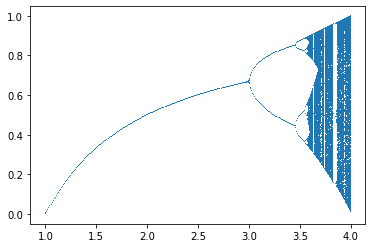

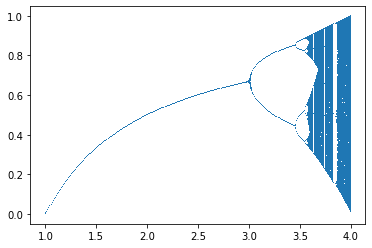

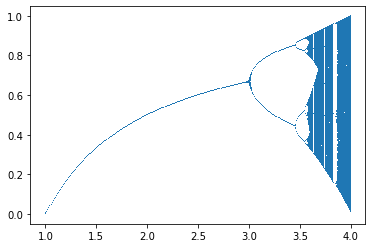

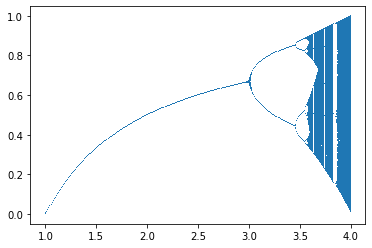

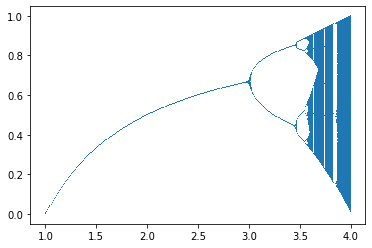

In [58]:
#funkcja bifurcation_diagram użyta ze stackoverflow

def bifurcation_diagram(r_array, x0_array, float_type):
    R_val = []
    X_val = []

    for x0 in x0_array:
        for r in r_array:
            x = x0
            for iterations in range(1001):
                x = logistic_mapping(r, x, float_type)
                if iterations > 150:
                    R_val.append(r)
                    X_val.append(x)
        plt.plot(R_val, X_val, ls='', marker=',')
        plt.show()


r = np.arange(1, 4, 0.01)
x0 = [0.12, 0.33333, 0.5, 0.5555, 0.991]
x0_f32 = list(map(lambda a: float32(a), x0))

bifurcation_diagram(r, x0_f32, float32)

Dla różnych wartości x0 i tych samych wartości r diagramy bifurakcyjne wyglądają podobnie - prawdopodobnie nie zależą one w dużym stopdniu od x0.

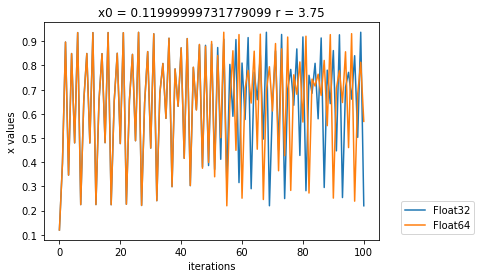

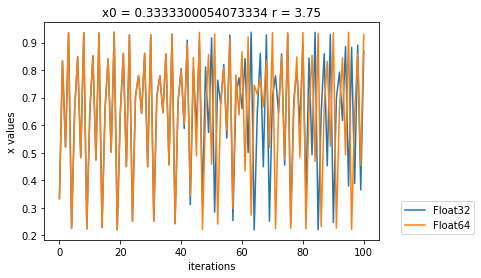

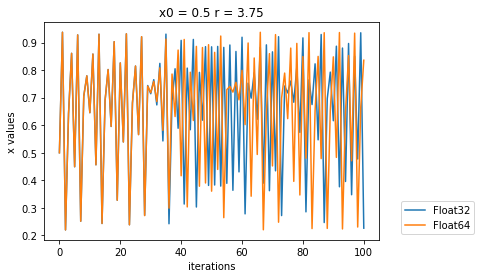

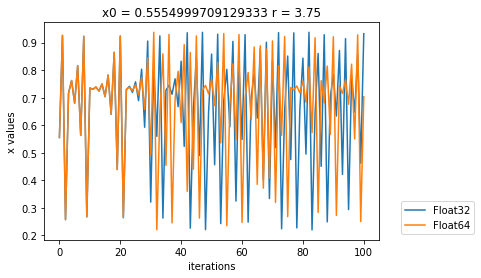

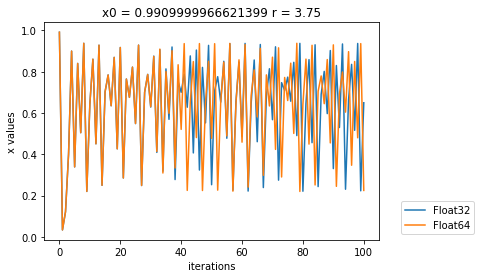

In [59]:
x0_f64 = list(map(lambda a: float64(a), x0))


def trajectories(x_float_32, x_float_64, r_float_32, r_float_64, iterations=100):
    f32_values = [x_float_32]
    f64_values = [x_float_64]

    for i in range(1, iterations + 1):
        f32_values.append(logistic_mapping(r_float_32, f32_values[i - 1], float32))
        f64_values.append(logistic_mapping(r_float_64, f64_values[i - 1], float64))

    plt.plot(f32_values)
    plt.plot(f64_values)
    plt.ylabel("x values")
    plt.xlabel("iterations")
    plt.legend(['Float32', 'Float64'], bbox_to_anchor=(1.3, 0.2))
    plt.title(f"x0 = {x_float_32} r = {r_float_32}")
    plt.show()


r = 3.75

for (i, j) in zip(x0_f32, x0_f64):
    trajectories(i, j, float32(r), float64(r))

Początkowo liczby pojedynczej i podwójnej prezycji pokrywają się, lecz ze wzrostem iteracji zaczynają od siebie odbiegać.
Moment po ilu iteracjach zaczynają się różnić zależny jest od x0. Dla x0 = 0.5555 widać różnicę już po około 25 iteracjach a dla x0 = 0.12 dopiero po 50.

Max iterations:  10000
Epsilon:  1e-07
Not found result:  819
Found: 181



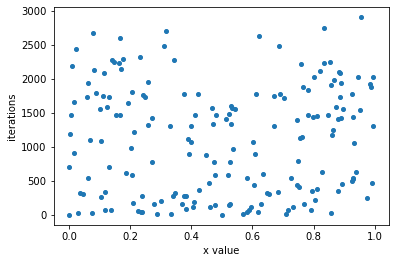

Max iterations:  3000
Epsilon:  1e-06
Not found result:  189
Found: 811



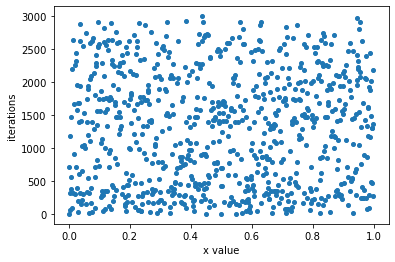

In [60]:
def find_iterations_for_0(x, r, epsilon, convert_to_float, max_iterations):
    iterations = 0
    while x > epsilon:
        x = logistic_mapping(r, x, convert_to_float)
        iterations += 1

        if iterations > max_iterations:
            return -1

    return iterations


def plotting_iterations_to_0(x0_values, r, epsilon, max_iterations):
    iterations = []
    x0_values_with_0 = []
    not_found = 0

    for x in x0_values:
        val = find_iterations_for_0(x, r, epsilon, float32, max_iterations)
        if val >= 0:
            iterations.append(val)
            x0_values_with_0.append(x)
        else:
            not_found += 1

    print("Max iterations: ", max_iterations)
    print("Epsilon: ", epsilon)
    print("Not found result: ", not_found)
    print("Found:", len(x0_values) - not_found)
    print()
    plt.plot(x0_values_with_0, iterations, marker="o", ls="", markersize=4)
    plt.xlabel("x value")
    plt.ylabel("iterations")
    plt.show()


x0 = np.arange(0, 1, 0.001, dtype=float32)
plotting_iterations_to_0(x0, 4, 1e-7, 10000)
plotting_iterations_to_0(x0, 4, 1e-6, 3000)

Z 1000 wartości x0 jedynie dla 181 liczba iteracji (przy max_iterations = 10000) została znaleziona, jest to bardzo mała wartość. Aby znaleźć większą ilość potrzebnych iteracji należałoby zwiększyć zakres max_iterations lub epsilon, niestety to wydłuża czas działania programu.
Ciężko również określić jakich wyników się spodziewać, ponieważ dla max_iterations = 10000 maksymalna znaleziona ilość iteracji wynosi około 3000. Nie widać również jasnej zależności między iteracjami i x0 dla r = 4 (wykres jest mocno rozporoszony).

Dla zwiększonego epsilona oraz zmiejszonej liczby iteracji rozwiązanie zostało znalezione dla 811 wartości. Niestety nie jest to dokładne rozwiązanie, bo epsilon został zwiększony aż 10 krotnie.